In [1]:
import numpy as np
import pandas as pd

## 1. Altere nossa implementação de kNN para que ela possa calcular regressão

In [2]:
# Distância euclidiana
def euclidean_distances(X, X_row):
    X_ = (X - X_row) ** 2
    return np.sum(X_, axis=1) ** 0.5

In [3]:
# k vizinhos mais proximos
def get_neighbors(X_train, test_row, k):
    distances = euclidean_distances(X_train, test_row)
    idx_sort = np.argsort(distances)
    return idx_sort[:k]

In [4]:
# Regressão de novo k
def predict_regression(X, y, test_row, k):
    idx_sort = get_neighbors(X, test_row, k)
    output_values = y[idx_sort]
    prediction = np.mean(output_values)
    print('idx_sort:{}, output_values:{}, prediction:{}'.format(idx_sort, output_values, prediction))
    return prediction

## 2. Use os seguintes dados como dados de treino (X_treino) para o kNN, onde House Price Index é o nosso rótulo (label ou y_treino):
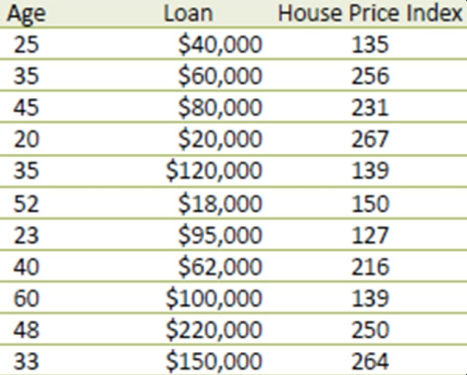

In [5]:
df_train = pd.DataFrame({
    'Age': [25,35,45,20,35,52,23,40,60,48,33],
    'Loan': [40,60,80,20,120,18,95,62,100,220,150],
    'House Price Index': [135,256,231,267,139,150,127,216,139,250,264]
})

In [6]:
X_train = df_train.drop(columns=['House Price Index'], axis=1).values
y_train = df_train['House Price Index'].values

### Use a implementação de regressão para o kNN implementada na Questão 1 para:

### a) Calcular o rótulo para quando Age = 42 e Loan = $142,000.

In [10]:
predict_regression(X_train, y_train, (42, 142), k=2)

idx_sort:[10  4], output_values:[264 139], prediction:201.5


201.5

In [12]:
predict_regression(X_train, y_train, (42, 142), k=3)

idx_sort:[10  4  8], output_values:[264 139 139], prediction:180.66666666666666


180.66666666666666

### b) Calcular o rótulo para quando Age = 30 e Loan = $50,000.


In [11]:
predict_regression(X_train, y_train, (30, 50), k=2)

idx_sort:[0 1], output_values:[135 256], prediction:195.5


195.5

In [13]:
predict_regression(X_train, y_train, (30, 50), k=3)

idx_sort:[0 1 7], output_values:[135 256 216], prediction:202.33333333333334


202.33333333333334